# Review: Big Data Systems

### Traditional

* relation = specific kind of table = $\{ (col_1, col_2, \dots), \dots \}$
    * `{ (1, "Michael", "UK"), (2, "Alice", "FR") ...}`
* relational database management system
    * primary property: consistency 
        * strongly prefer to BLOCK/BREAK the system than to have
            * out-of-order, invalid, etc. data

### Big Data

* when those two properties fail
    * relational
    * consistent

* non-relational = nosql
    * graph 
    * document
    * key-value
    * columnar (dataframe) = tabular
        * non-relational table = `{ (1, 2), ("Michael", "Alice"), ("UK", "FR"), ...}`
    * distributed file system
    
* consistency = eventual-consistency 
    * distributed file system
        * order of loading files (etc.) doesnt matter
    * streaming = processing one-row/time fast
        * don't care about history 

## Non-Relational

* graph 
    * dictionary: `{"Michael": [(from, to, weight), (from, to, weight), ...]}`
        * one operation to find "Michael"'s friends
        * relational tables require looping over rows
    * edge list: `[(col1, col2, col3), (col1, col2,col3), ...]` 
        * from, to, weight (aka. relationship information)
        

* document 
    * user + profile + city + ratings
        * relatively expensive to JOIN tables together


In [5]:
user = {
    "name": "Micahel",
    
    # JOIN
    "profile": {
        "city": "London"
    },
    
    # JOIN
    "city": {
        "population": 10_000_000
    },
    
    # JOIN
    "ratings": [
        {"film": "One", "rating": 9}, # ...
    ]
}

In [9]:
user["ratings"][0]["film"] # three operations, no loop

'One'

* most real-world systems dont want "all the information together"
    * they want to chop-and-change pieces per-query
    * document dbs are really bad at doing (slow, etc.)

## Key-Value: Flat Dictionary = Fast Search

* fast querying of simple data
    * cache results

In [15]:
info = {
    # key               # value
    "/users/michael/1": "WHISKEY",
    "/users/alice/1": "WINE",
    "/products/whiskey/1": "BOURBON",
    "SELECT * FROM blah": "..."
}

In [17]:
info["/users/michael/1"] # one operation

'WHISKEY'

## Columnar = DataFrame

* analytical use case (historical data vs. operational/live)
* 100s columns
* subsets of columns

In [18]:
import seaborn as sns

In [20]:
columnar_table = sns.load_dataset('titanic')

* two whole columns split by one whole column
    * no row-based filtering

In [24]:
columnar_table[['age', 'fare']].groupby(columnar_table['sex']).mean()

,age,fare
sex,,
female,27.915709,44.479818
male,30.726645,25.523893


---

## Streaming & Events

### Non-Relational Data Structure = Append-Only Log
* extremely fast
    * no checks for consistency 
    * no modifications (immutable)

In [26]:
log = []

In [31]:
log.append({"subject": "Michael", "verb": "DRINK", "object": "WHISKEY", "context": "1pm"})

In [32]:
log

[{'subject': 'Michael',
  'verb': 'DRINK',
  'object': 'WHISKEY',
  'context': '1pm'},
 {'subject': 'Michael',
  'verb': 'DRINK',
  'object': 'WHISKEY',
  'context': '1pm'},
 {'subject': 'Michael',
  'verb': 'DRINK',
  'object': 'WHISKEY',
  'context': '1pm'},
 {'subject': 'Michael',
  'verb': 'DRINK',
  'object': 'WHISKEY',
  'context': '1pm'},
 {'subject': 'Michael',
  'verb': 'DRINK',
  'object': 'WHISKEY',
  'context': '1pm'}]

### PROBLEM: Streaming (processing one/time)

* traditional data processing: just take a mean over all your rows!

In [34]:
tips = sns.load_dataset('tips')

In [36]:
tips['tip'].mean()

2.99827868852459

In [57]:
tip_steam = tips.iterrows() # api.get_event_steam()

In [58]:
est_total = 0
est_mean = []
for row_id, row in tip_steam:
    est_total += row['tip']
    est_mean.append(est_total/(row_id+1))

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

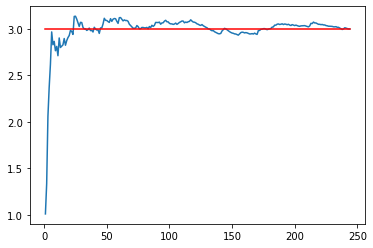

In [70]:
%matplotlib inline

sns.lineplot(range(1, 245), est_mean)
sns.lineplot(range(1, 245), [2.99827] * 244, color="Red")

In [48]:
list(tip_steam)

[]